# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [38]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'

## Reading input data

In [39]:
def read_input(problem_name):
    global n, A, B
    QAP_INSTANCE_URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{problem_name}'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)

## Objective function

In [40]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [41]:
read_input("Nug12.dat")
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

HTTPError: HTTP Error 404: Not Found

## Random Sampling

In [13]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

NameError: name 'n' is not defined

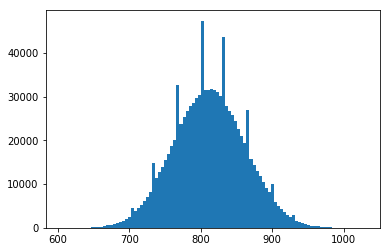

811.921768 49.7013396173


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [16]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [21]:
def simulated_annealing(T, radius):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    return costs.min()

In [22]:
T = 500000
radius = 1

Podpunkt A

In [23]:
problems=["nug15.dat", "nug24.dat"]
print(f"With T={T}, radius={radius}")
for problem in problems:
    read_input(problem)
    print(f"For {problem}")
    solution=simulated_annealing(T, radius)
    print(f"Solution: {solution}")

With T=500000, radius=1


HTTPError: HTTP Error 404: Not Found

Podpunkt B

In [24]:
problem="nug15.dat"
read_input(problem)
for i in range(500):
    costs[i]=simulated_annealing(T, radius)
    print(f"Solution: {solution}")

plt.figure()
plt.hist(costs, bins=100)
plt.show()

HTTPError: HTTP Error 404: Not Found

Podpunkt C

In [30]:
radius=50
def simulated_annealing_with_win_lose_info(T, radius):
    t0 = time.time()
    step=2000
    successes_in_step=0
    accepted_losses_in_step=0
    successes=np.zeros(T // step)
    accepted_losses=np.zeros(T // step)
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
            successes_in_step += 1
        elif(np.random.rand() < np.exp(- (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            accepted_losses_in_step += 1
        costs[t] = p_cost
        if ((t+1) % step == 0):
            step_number= (t + 1) // step
            successes[step_number-1]=successes_in_step
            accepted_losses[step_number-1]=accepted_losses_in_step

    print(time.time() - t0, costs.min())
    return (successes, accepted_losses)

In [31]:
successes, accepted_losses=simulated_annealing_with_win_lose_info(T, radius)
plt.figure()
plt.plot(successes)
plt.show()

plt.figure()
plt.plot(accepted_losses)
plt.show()

NameError: name 'n' is not defined

Podpunkt D

Odelgłość między permutacjami można mierzyć na przykład przez liczbę różniących się pozycji permutacji.

In [32]:
radius=50
def simulated_annealing_with_permutations_differences_info(T, radius):
    t0 = time.time()
    differences=[[] for i in range(n)]
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            pq_difference=len([i for i in range(n) if p[i] != q[i]])
            differences[pq_difference].append(p_cost-q_cost)
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    return differences

In [35]:
differences=simulated_annealing_with_permutations_differences_info(T, radius)
plt.figure()
plt.plot(differences)
plt.show()

NameError: name 'n' is not defined

Podpunkt e

In [36]:
def simulated_annealing_with_another_condition(T, temperature, factor, radius):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- (q_cost - p_cost) / temperature)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
        temperature *= factor

    print(time.time() - t0, costs.min())
    return costs.min()